<u>**Exercise #1**</u>  
In order to have a simple function on which to test Fourier transform routines, write a program to return data representing a square wave having its left edge at the origin of the $x$-axis.  Let the amplitude of the square wave be $h$, and its width be $w$, and let it be flanked on each side by a region of width $w$ and zero amplitude.  Thus, the entire function should extend from $x = -w$ to $x = +2w$, but it should be nonzero only in the range from $0$ to $w$.  Use  $1024$ ($= 2^{10}$) points in your construction of the square wave (including the zero regions).  Your program should plot the square wave, to prove that your code works as it should.  Test it by creating and plotting a square wave with height $1.0$ and width $0.5$.

In [1]:
import numpy as np
from scipy import math
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('dark_background')

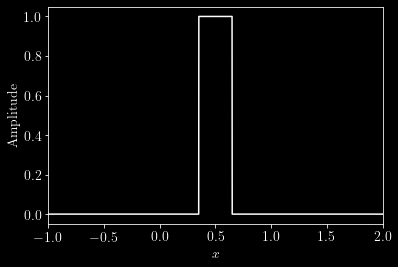

In [3]:
xmax = 1
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, 2 * xmax, num=npts, endpoint=True)
dc = 0.15
sqwv = signal.square(np.pi * (x - 0.5 + dc), duty = dc)/2 +1./2

plt.figure()
plt.xlim([-xmax,2. * xmax])
# plt.ylim([0,xmax])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, sqwv, 'w-')

<u>**Exercise #2**</u>  
(a) Apply the first (non-vectorized) DFT function presented in the module to your square wave function using the height and width of Exercise \#1, and make two plots of the output: one showing all of the data and another showing just the first $20$ values.  (It's useful to plot the data as large dots, using the 'o' argument to the `plot` function.)  Briefly describe and interpret the results. 

(b) Modify the first DFT function so that it computes <em>all</em> of the `c[k]` coefficients, including those with $k > \tfrac{1}{2} N$.  (The `numpy` function to compute a complex conjugate comes from the `numpy.ma` library and is called `conjugate`.) Run it and the vectorized version on the square wave data, and plot the two results (on separate graphs; as small dots, using '.').  To determine whether or not they're the same, plot the difference between them (on a third graph), and also use `numpy`'s `allclose` function, which returns `True` if corresponding elements of two arrays are the same to within some small tolerance.  (See the documentation for `numpy.allclose` for information on how to use it and on the default tolerances; other values may be provided by the user as arguments passed to the function).  Do the results agree with each other?  

(c) Using `numpy`'s `linspace` function, create sine wave data in the range (0, $2\pi$) using $1000$ data points, run your "full" or vectorized DFT function on it, and plot the first $10$ values.  Do the same for sine wave data in the range (0, $4\pi$), again with $1000$ data points.  Explain the two graphs. }

(d) Finally, run `numpy`'s `fft` function (from the `numpy.fft` library) on your square wave and on the first sine wave of (c) to check whether its outputs are the same as those from our DFT functions.

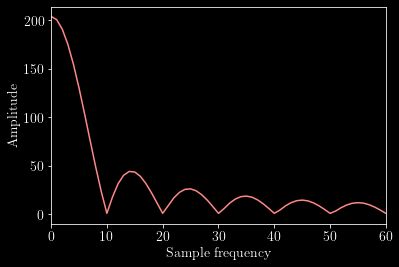

In [4]:
plt.figure()
plt.xlim([0, 60])
# plt.ylim([0,xmax])
plt.xlabel('Sample frequency')
plt.ylabel('Amplitude')
plt.plot(abs(np.fft.fft(sqwv)), '#ff8888')

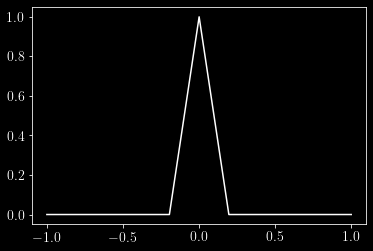

In [5]:
xmax = 1
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, xmax, num=npts, endpoint=True)
triang = []
width = 200
for i in range(0,int(npts/2)-width):
    triang.append(0)
for i in range(0,width):
    triang.append(1.*i/width)
for i in range(0,width):
    triang.append(1.-1.*i/width)
for i in range(0,int(npts/2)-width):
    triang.append(0)
# triang = signal.sawtooth(dc * np.pi * (x - 1 - dc), width = 0.5)
plt.plot(x, triang, 'w')

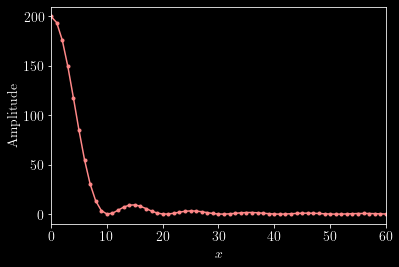

In [6]:
plt.figure()
plt.xlim([0, 60])
# plt.ylim([0,xmax])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(abs(np.fft.fft(triang)), '.-', color = '#ff8888')

<u>**Exercise #3**</u>  
To show the superior speed of `numpy`'s `fft` routine, apply it, the nonvectorized DFT routine you used in Exercise \#2, and the vectorized DFT routine, to your square wave.  Time how long it takes each routine to perform the Fourier transform by using the `timeit` magic [e.g., `%timeit fft(square)`].  How do the times compare (pay attention to the units)?

In [7]:
def dft_half(y):
    from numpy import zeros, exp, absolute    

    N = len(y)  
    numcoeffs = N//2 + 1
    C = zeros(numcoeffs, complex)  

    for k in range(numcoeffs):       
        for n in range(N):      
            C[k] += y[n] * exp(-2j * np.pi * k * n/N)   # "j" = sqrt(-1) in Python
    return absolute(C)    # returns absolute value of complex number

def dft_vect(x):
    from numpy import asarray, arange, reshape, exp, dot, pi, absolute

    x = asarray(x, dtype=float)   # force x to be array
    N = x.shape[0]                # length of array "x"
    n = arange(N)                 # list 0,...,N-1
    k = n.reshape((N, 1))         # make "k" a column-vector version of "n"
    M = exp(-2j * pi * k*n / N)   # k*n computes outer product of k & n vectors
    c = dot(M, x)
    
    return absolute(c)            # matrix-vector product

# %timeit dft_half(sqwv)

# %timeit dft_vect(sqwv)

# %timeit np.fft.fft(sqwv)

	
<u>**Exercise #4**</u>  
Import the sound data in the file `piano.txt`, which you should find where the modules are posted.  You will need to upload it to the directory in which you are running your notebook, and then read it into a variable using the syntax `sound = numpy.loadtxt('piano.txt')`, where "`sound`" is the variable name.  (a) Plot the data in this file.  (b) Now run `numpy`'s `fft` routine on the data, storing the Fourier transform output and plotting it as well.  You should see two large spikes, as well as several small ones (all in a symmetric pattern).  (c) Copy the data from the Fourier transform output to a new array, and change that new array so that the data points in the range 2001-98000 have the value 0: this will eliminate most of the smaller spikes in the Fourier transform.  Plot the new array to confirm this.  (d) Apply the reverse transform `ifft` to this new array, and plot the result.  How does it compare to the original `piano` plot?  Explain any differences you observe.  (e) Run the notebook `Soundfile_Player.ipynb` from the directory where the modules are posted.  It will produce audio players that you can run to play the original sound file and the one with the small spikes eliminated.  How do they compare?  Explain any differences you hear.  How does this mesh with what you observed in the plots of those files?   

In [8]:
sound = np.loadtxt('./Supplemental_Files/piano.txt')
len(sound)
pianofft = np.fft.fft(sound)

In [9]:
tpt440 = np.loadtxt('./Supplemental_Files/tpt440hz.txt')
len(tpt440)
tptfft = np.fft.fft(tpt440[30000:70000])

In [10]:
len(tpt440)

94720

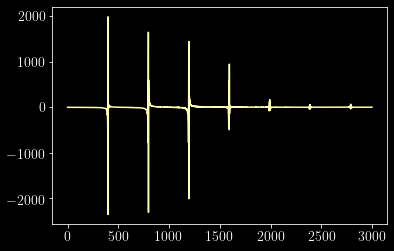

In [11]:
plt.plot(tptfft[:3000].imag)

([<matplotlib.axis.YTick at 0x2e5ea700e50>,
 <a list of 6 Text yticklabel objects>)

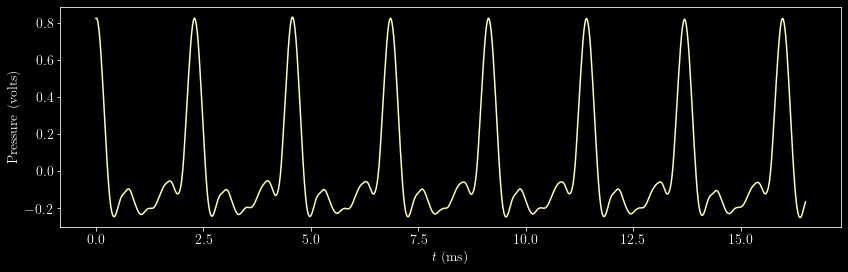

In [12]:
tptwave = tpt440[46072:46800]
t = np.linspace(0, len(tptwave)/44.1, len(tptwave))
plt.figure(figsize=(12,4))
# plt.xlim([4355, 4960])
# plt.ylim([0,xmax])
plt.xlabel('$t$ (ms)')
plt.ylabel('Pressure (volts)')
plt.plot(t, tptwave)
plt.tight_layout()
plt.yticks(.2*np.array([-1,0,1,2,3,4]))
# plt.savefig('../../Teaching/Sound/tpt440.svg', facecolor=(0,0,0,0))

In [13]:
len(tpt440)/44100

2.147845804988662

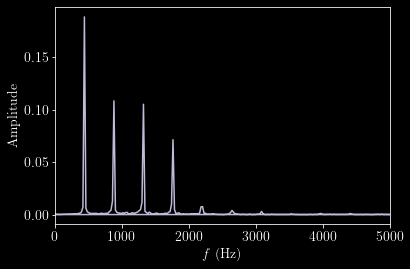

In [14]:
ptmax = 6500
ptmin = 4500
t = np.linspace(0, len(tpt440)/44100, num=len(tpt440), endpoint=True)
f = np.fft.fftfreq(ptmax-ptmin, 1/44100)
tptfft = abs(np.fft.fft(tpt440[ptmin:ptmax])/(ptmax-ptmin+1))
tptfftr = np.fft.fft(tpt440[ptmin:ptmax]).real
tptffti = np.fft.fft(tpt440[ptmin:ptmax]).imag

plt.figure()
plt.xlim([0, 5000])
# plt.ylim([0,xmax])
plt.xlabel('$f$ (Hz)')
plt.ylabel('Amplitude')
plt.plot(f, tptfft, 'C1')

# plt.ylabel('Power (dB)')
# plt.plot(f, 20*np.log10(tptfft), 'C1')


# plt.savefig('tpt440fft.svg')

In [15]:
peakpts, peakheights = signal.find_peaks(abs(np.fft.fft(tpt440[ptmin:ptmax])/(ptmax-ptmin+1)), height = 0.0025)

In [16]:
phases = np.arctan2(tptffti[peakpts], tptfftr[peakpts])
amps = tptfft[peakpts]
t = np.linspace(0, 10, 10*44100)
tptwave = 0*t
for n in np.arange(int((len(amps)-1)/2)):
    tptwave = tptwave + amps[n]*np.exp(-1j*(np.math.tau*(n+1)*440*t+phases[n]))

In [17]:
print(peakpts, phases*360/np.math.tau)
print(peakheights)

[  20   40   60   80  100  120  140 1860 1880 1900 1920 1940 1960 1980] [ -53.38782699 -110.60205562 -171.27757277  119.45805204   15.58738334
   80.27882957   75.78769148  -75.78769148  -80.27882957  -15.58738334
 -119.45805204  171.27757277  110.60205562   53.38782699]
{'peak_heights': array([0.18813954, 0.10819875, 0.1049761 , 0.07124699, 0.007572  ,
       0.00395066, 0.0029643 , 0.0029643 , 0.00395066, 0.007572  ,
       0.07124699, 0.1049761 , 0.10819875, 0.18813954])}


In [18]:
from scipy.io.wavfile import write

write('./Supplemental_Files/tptsynth.wav', 44100, tptwave.real)

(0, 0.0075)

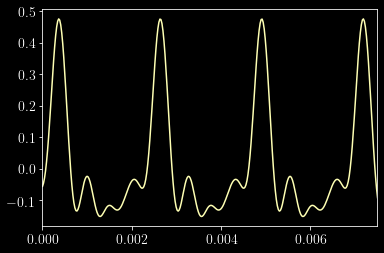

In [19]:
plt.plot(t, tptwave.real)
plt.xlim([0,0.0075])

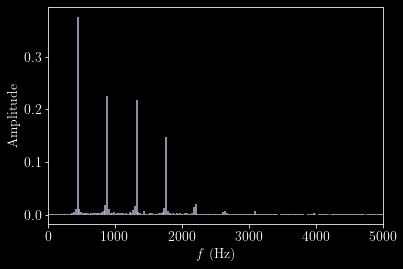

In [21]:
ptmax = 6101
ptmin = 4400
plt.figure()
plt.xlim([0, 5000])
# plt.ylim([0,xmax])
plt.xlabel('$f$ (Hz)')
plt.ylabel('Amplitude')
plt.vlines(np.linspace(0, 44100, num=ptmax-ptmin+1), 0, 2*abs(np.fft.fft(tpt440[ptmin:ptmax])).real/(ptmax-ptmin+1), 'C1')
# plt.savefig('tpt440fft.svg')

In [22]:
max(2*abs(np.fft.fft(tpt440[ptmin:ptmax])).real)/(ptmax-ptmin+1)/\
max(tpt440[4400:6101])-min(tpt440[4400:6101]) * 80.814

29.733439481373107

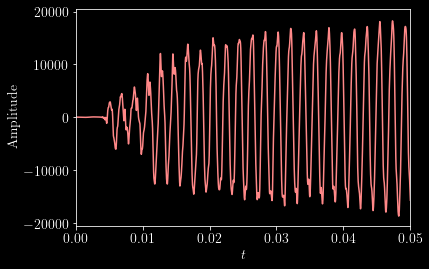

In [23]:
plt.figure()
plt.xlim([0, .05])
# plt.ylim([0,xmax])
plt.xlabel('$t$ (ms)')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0,len(sound)/44.100, num=len(sound)), sound, '#ff8888')

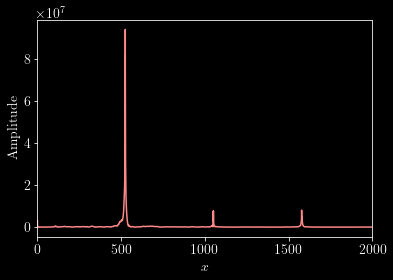

In [24]:
plt.figure()
plt.xlim([0, 2000])
# plt.ylim([0,xmax])
plt.xlabel('$f$')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, 44100, num=len(sound)), abs(np.fft.fft(sound)).real, '#ff8888')

In [25]:
pianofftfilt = pianofft
pianofftfilt[2000:98001] = 0

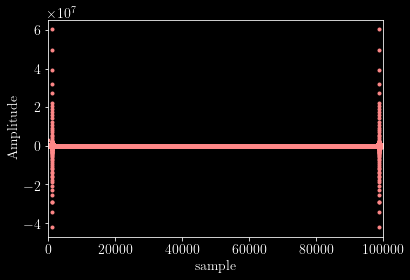

In [26]:
plt.figure()
plt.xlim([0, 100000])
# plt.ylim([0,1e8])
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.plot(pianofftfilt.real, '.', color='#ff8888')

c:\python3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


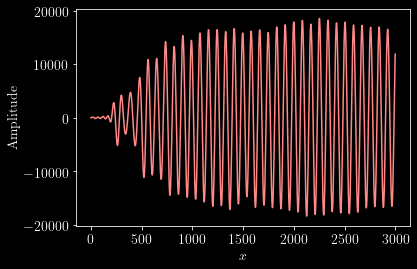

In [27]:
plt.figure()
# plt.xlim([0, 3000])
# plt.ylim([0,1e8])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(np.fft.ifft(pianofftfilt)[:3000], '#ff8888')

In [28]:
from scipy.io.wavfile import write


data = np.fft.ifft(pianofftfilt)
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
write('./Supplemental_Files/pianofilt.wav', 44100, scaled)

<ipython-input-28-1d602a2f1b9c>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  scaled = np.int16(data/np.max(np.abs(data)) * 32767)


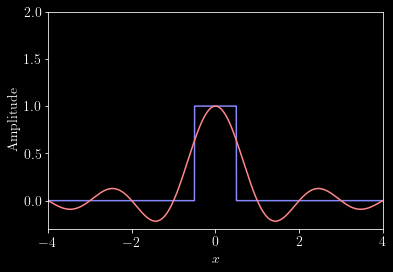

In [29]:
xmax = 4
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, xmax, num=npts, endpoint=True)
dc = 0.2
a = 1
sqwv = signal.square(np.pi * (x+0.5)/2.5, duty=dc)/2+0.5
sinc = np.sinc(x/a)/a

plt.figure()
plt.xlim([-xmax, xmax])
plt.ylim([-0.3,2])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, sqwv, '#8888ff', x, sinc, '#ff8888')
# plt.savefig('squarepulse.svg', transparent=True)
# plt.savefig('squaresinc.svg', transparent=True)

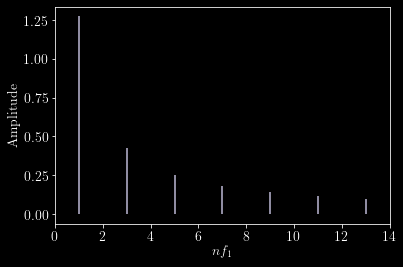

In [30]:
xmax = 4
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, xmax, num=npts, endpoint=True)
dc = 0.5
a = 1
sqwv = signal.square(np.pi * x, duty=dc)

plt.figure()
plt.xlim([0,14])
# plt.ylim([-0.3,2])
plt.xlabel('$n f_1$')
plt.ylabel('Amplitude')
# plt.plot(x, sqwv, 'r.')
plt.vlines(np.linspace(0, npts/xmax, num = npts), 0, 2*abs(np.fft.fft(sqwv))/npts, color='C1')
# plt.savefig('squarefft.svg', transparent=True)

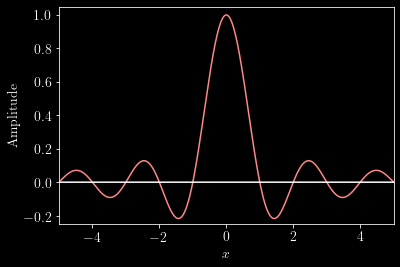

In [31]:
xmax = 5
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, 2 * xmax, num=npts, endpoint=True)
sinc = np.sinc(x)

plt.figure()
plt.xlim([-xmax, xmax])
plt.ylim([-0.25, 1.05])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, sinc, '#ff8888', x, 0*x, 'w')
# plt.savefig('sinc.svg', transparent=True)

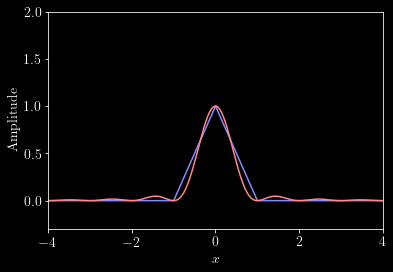

In [32]:
xmax = 4
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, xmax, num=npts, endpoint=True)
triang = []
width = 256
for i in range(0,int(npts/2)-width):
    triang.append(0)
for i in range(0,width):
    triang.append(1.*i/width)
for i in range(0,width):
    triang.append(1.-1.*i/width)
for i in range(0,int(npts/2)-width):
    triang.append(0)
# triang = signal.sawtooth(dc * np.pi * (x - 1 - dc), width = 0.5)

plt.xlim([-xmax, xmax])
plt.ylim([-0.3,2])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, triang, '#8888ff', x, np.sinc(x)**2, '#ff8888')
# plt.savefig('trisinc2.svg', transparent=True)

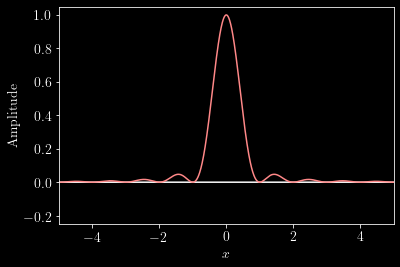

In [33]:
xmax = 5
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, 2 * xmax, num=npts, endpoint=True)
sinc = np.sinc(x)**2

plt.figure()
plt.xlim([-xmax, xmax])
plt.ylim([-0.25,1.05])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, 0*x, 'w-', x, sinc, '#ff8888')
# plt.savefig('sinc2.svg', transparent=True)

In [34]:
def gauss(x,m,sig):
#   f = (sig**2 * 2 * np.pi)**(-.5) * np.exp((-((x-m)/sig)**2/2))
    return f

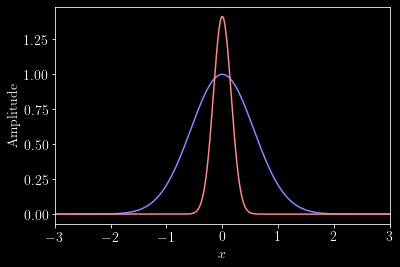

In [35]:
xmax = 3
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, 2 * xmax, num=npts, endpoint=True)

plt.figure()
plt.xlim([-xmax, xmax])
# plt.ylim([-0.25,1.05])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, 0*x, 'k-')
plt.plot(x, np.exp(-np.pi*x**2/2), '#8888ff',\
         x, (2.)**0.5 * np.exp(-2 * (np.pi*x)**2), '#ff8888')
# plt.savefig('gauss.svg', transparent=True)

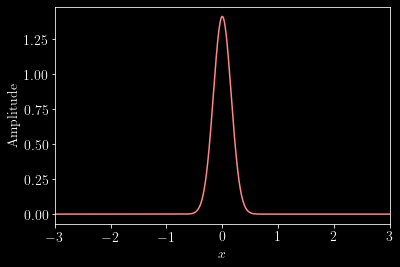

In [36]:
plt.figure()
plt.xlim([-xmax, xmax])
# plt.ylim([-0.25,1.05])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, 0*x, 'k-')
plt.plot(x, (2.)**0.5 * np.exp(-2 * (np.pi*x)**2), '#ff8888')
# plt.savefig('gaussft.svg', transparent=True)

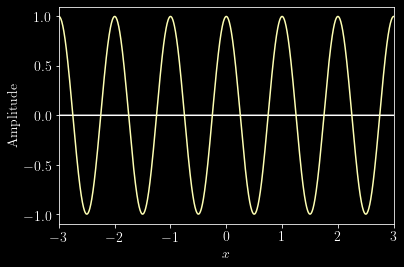

In [37]:
plt.figure()
plt.xlim([-xmax, xmax])
# plt.ylim([-0.25,1.05])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, 0*x, 'w-')
plt.plot(x, np.cos(x * math.tau))
# plt.savefig('cosine.svg', transparent=True)

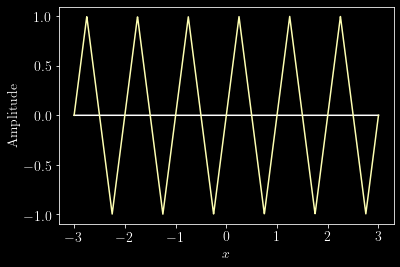

In [38]:
xmax = 3
# dx = 2.**(-6)
npts = 2**11 # xmax/dx
x = np.linspace(-xmax, xmax, num=npts, endpoint=True)

dc =0.5
# sqwv = signal.square(math.tau * (x + 0.0*dc), duty = dc)
triwv = signal.sawtooth(math.tau * (x+0.25), width = 0.5)
trifft = np.fft.fft(triwv)

plt.figure()
# plt.xlim([0, 14])
# plt.ylim([-0.25,1.05])
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.plot(x, 0*x, 'w-')
plt.plot(x, triwv)
# plt.vlines(np.linspace(0, npts/2/xmax, num = npts), 0, 2*abs(trifft)/npts, color='#860bb8')
# plt.savefig('triwv.svg', transparent=True)

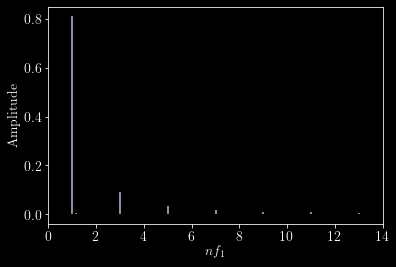

In [39]:
plt.figure()
plt.xlim([0, 14])
# plt.ylim([-0.25,1.05])
plt.xlabel('$nf_1$')
plt.ylabel('Amplitude')
# plt.plot(x, 0*x, 'k-')
# plt.plot(x, triwv, color='#b8860b')
plt.vlines(np.linspace(0, npts/2/xmax, num = npts), 0, 2*abs(trifft)/npts, color='C1')
# plt.savefig('trifft.svg', transparent=True)